In [3]:
import pickle
import pandas as pd
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
from matplotlib import pyplot as plt
import matplotlib



chsize= 6
labelsize=8
annotation_txt_size = 7
abcd_size = 8
height_width_ratio = 2. / (1 + np.sqrt(5))

one_column_width = 3.5 # inches (this is from author guidelines)
two_column_width = 7.5 # inches (this is a guess)




def plot_partial_dependence(rf, X, features,filename = None,
                            nrows=None, ncols=None, chsize=6,labelsize=7,
                            structured=False, fig_width = 183./25.4):

    cleaned_labels = {'Shore_len':'Shoreline length (km)',
                      'Depth_avg':'Mean depth (m)', 
                      'Lake_area': 'Lake area (km$^2$)',
                      'Elevation': 'Elevation (m)',
                      'Slope_100': 'Slope within 100 m (\N{DEGREE SIGN})',
                     'Shore_dev': 'Shoreline development',
                     'TMINMAX_lagSON' : 'Fall temperature, $T_\mathrm{SON}$ (K)',
                      'TMINMAX_lagJJA': 'Summer temperature, $T_\mathrm{JJA}$ (K)',
                      'TMINMAX_DJF': 'Winter temperature, $T_\mathrm{DJF}$ (K)',
                     'TMINMAX_MAM': 'Spring temperature, $T_\mathrm{MAM}$ (K)'}
    if ncols is None:
        if structured:
            nrows = int(np.sqrt(len(features)))
            ncols = nrows
        else:
            nrows = int(np.ceil(len(features) / 3))
            ncols = np.min([3,len(features)])
    
    left_margin = 1.6 # inches
    right_margin = 0.5 # inches
    top_margin = 1.15 # inches
    bottom_margin = 0.8 # inches
    if structured:
        w_gap =0.05
        h_gap = 0.05
    else:
        w_gap = 0.5 # inches
        h_gap = 0.6 # inches
    
   # inches
    plot_width = (fig_width - left_margin - right_margin - (w_gap)*(ncols-1))/ncols
    plot_height = plot_width
    fig_height = bottom_margin + top_margin + plot_height*(nrows) + h_gap*(nrows-1)
    
    fig,axes =plt.subplots(nrows, ncols, figsize = (fig_width, fig_height), sharex='col',squeeze=False)
    #levels = [-50,-40,-30,-20,-10,0,10]
    mi, ma = -50, 10
    norm = matplotlib.colors.Normalize(vmin=mi,vmax=ma)
    bounds = [-47.8608595  ,-40.73487913, -33.60889877 ,-26.48291841 ,-19.35693805,
            -12.23095769 , -5.10497732 ,  2.02100304]
    if 'TMINMAX_MAM' in features:
        bounds = [ 73.46915222 ,80.79657421 , 88.1239962,   95.45141819, 102.77884018,
 110.10626217, 117.43368416 ,124.76110615]
    cmap = matplotlib.cm.viridis
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    pdp_display = PartialDependenceDisplay.from_estimator(rf,X,features=features,
                                                          line_kw = dict(color='k'),
                                            
                                                          #contour_kw = dict(norm = norm), #levels=levels), 
                                            ax=axes.flatten()[:len(features)])
    #return pdp_display
    for i,ax in enumerate(axes.flatten()):
        #if ax in [axes[0],axes[2]]:
        #    ax.set_xscale('log')
        #if ax == axes[2]:
        #    for c in ax.get_children():
        #        try:
        #            c.set_fontsize(6)
        #        except:
        #            pass
        col_num = i % ncols
        row_num = i // ncols
        if i >= len(features):
            ax.set_visible(False)
            continue
        if isinstance(features[i],tuple):
            xlabel = cleaned_labels[features[i][0]]
            ylabel = cleaned_labels[features[i][1]]
        else:
            xlabel = cleaned_labels[features[i]]
            ylabel = xlabel
            
        if (xlabel in ['Lake area (km$^2$)']):#,'Depth_avg','Elevation']:
            ax.set_xscale('log')
        #if (ylabel in ['Lake area (km$^2$)']):
        #    ax.set_yscale('log')
            
        # remove labels from contours
        if (ax.get_ylabel()!='Partial dependence'):
            for c in ax.get_children():
                try:
                    # adjust fontsize
                    c.set_fontsize(chsize)
                    c.set_visible(False)
                except:
                    pass
        if structured:
            #fmt_dict = {str(i)+'.00':str(i) for i in levels}
            #print(fmt_dict)
            #try:
            #    ax.clabel(pdp_display.contours_[row_num][col_num],fmt=fmt_dict)
            #    print('yes')
            #except:
            #    pass
            ax.set_ylabel('')
            ax.set_xlabel('')
            if col_num==row_num:
                ax.tick_params(axis='y',direction='in',pad=-20,labelright=True,labelleft=False,left=False,right=True)
            elif col_num == ncols-1:
                ax.tick_params(axis='y',labelright=True, labelleft=False,left=False,right=True)
            elif col_num!=0:
                ax.tick_params(axis='y',labelleft=False,left=True,right=True,direction='in')
            #if row_num==0:
            #    tax = ax.set_title(xlabel,ha='left',rotation=45,fontsize = 6)
            #    tax.set_visible(True)
            if col_num == 0:
                ax.set_ylabel(ylabel,rotation=0,ha='right',fontsize = labelsize)
                if row_num==0:
                    ax.set_ylabel(ylabel,rotation=0,ha='right',fontsize=labelsize,labelpad=20)
            
            #if row_num == nrows-1:
            #    ax.set_xlabel(xlabel,ha='right',rotation=45,fontsize=6)
            if row_num == 0:
                ax.set_xlabel(xlabel,ha='left',rotation=45,fontsize=labelsize)
                ax.xaxis.set_label_position('top') 
                ax.tick_params(axis='x', labelsize=chsize,labeltop=True, top=True, labelbottom=False,bottom=False)
        
        elif ((ax.get_ylabel()=='Partial dependence')) & (col_num!=0):
            ax.set_ylabel('')
            ax.set_xlabel(xlabel,fontsize=labelsize)
        else:
            ax.set_xlabel(xlabel,fontsize=labelsize)
        
        
        #for key,value in cleaned_labels.items():
        #    ax.set_ylabel(ax.get_ylabel().replace(key,value), fontsize=8)
        #    ax.set_xlabel(ax.get_xlabel().replace(key,value), fontsize=8)
        ax.tick_params(labelsize=chsize)

        
    #CS = matplotlib.contour.ContourSet(axes[nrows-1][:], levels =[-47.8608595  ,-40.73487913, -33.60889877 ,-26.48291841 ,-19.35693805,
# -12.23095769 , -5.10497732 ,  2.02100304])
    
    if structured | (len([f for f in features if len(f)==2])>0):
        cb = fig.colorbar(#CS,
                          matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),anchor = (0.5,-.8),
                          orientation='horizontal',ax = axes.flatten(), shrink=0.5, use_gridspec=True)
        cb.ax.set_xlabel('Partial dependence (day of year)',fontsize = labelsize)
        cb.ax.tick_params(axis='x',labelsize=chsize)
    
    
    fig.subplots_adjust(wspace=w_gap/plot_width,left=left_margin/fig_width, right=1 - right_margin/fig_width,
                        top=1 - top_margin/fig_height,bottom=bottom_margin/fig_height, hspace = h_gap / plot_height)
    if filename is not None:
        fig.savefig(f'/Users/blagrave/Projects/IcePhenologyModels/Figures/{filename}.png',dpi=300)
        fig.savefig(f'/Users/blagrave/Projects/IcePhenologyModels/Figures/{filename}.pdf')
    return pdp_display

In [4]:
#pdp_display = plot_partial_dependence(rf, X, columns, filename=f'{file}_pdp', structured=True)

In [5]:
#rf.oob_score_

In [6]:
import matplotlib.gridspec as gridspec

def plot_model_summary(rf, X, features, chsize=7, labelsize=7, width=88., labels=['(a)','(b)']):
    
    
    ncols = len(features)*2
    nrows = 2
    top_margin = 0.1
    bottom_margin = 0.7
    left_margin = 0.8
    right_margin = 0.2
    w_gap = 0.05
    h_gap = 0.5
    spec_row_ratio = 1 / 0.5
    print(spec_row_ratio)
    #print(one_column_width)
    fig_width = one_column_width # inches
    
    # width and height of partial dependence plots
    plot_width = ((fig_width - left_margin - right_margin - (w_gap)*(ncols-1))/ncols)*2+w_gap
    
    plot_height = plot_width #* spec_row_ratio
    
    col_width = (plot_width - w_gap)/2
    
    #print('plot_width',plot_width)
    avg_plot_height = plot_height * (1 + spec_row_ratio)/2.
    fig_height = bottom_margin + top_margin + plot_height + plot_height*spec_row_ratio + h_gap*(nrows-1)
    #print('fig_height',fig_height)


    
    cleaned_labels = {'Shore_len':'Shoreline length (km)',
                      'Depth_avg':'Mean depth (m)', 
                      'Lake_area': 'Lake area (km$^2$)',
                      'Elevation': 'Elevation (m)',
                      'Slope_100': 'Slope within 100 m (\N{DEGREE SIGN})',
                     'Shore_dev': 'Shoreline development',
                      'SNOW_DJF':'Winter snowfall (mm)',
                      'PRCP_MAM':'Spring precipitation (mm)',
                     'TMINMAX_lagSON' : #'Fall temperature\n
                          '$T_\mathrm{SON}$ (\N{DEGREE SIGN}C)',
                      'TMINMAX_lagJJA': #'Summer temperature\n
                          '$T_\mathrm{JJA}$ (\N{DEGREE SIGN}C)',
                      'TMINMAX_DJF': #'Winter temperature\n
                          '$T_\mathrm{DJF}$ (\N{DEGREE SIGN}C)',
                     'TMINMAX_MAM': #'Spring temperature\n'
                          '$T_\mathrm{MAM}$ (\N{DEGREE SIGN}C)'}
    cleaned_labels_min = {i:j.replace(' ','\n') for i,j in cleaned_labels.items() if ('Slope' not in i) }
    cleaned_labels_min['Slope_100'] = 'Slope\nwithin\n100 m (\N{DEGREE SIGN})'
    
    #fig = plt.figure(figsize=(width/25.4, 88./25.4*0.85))
    fig = plt.figure(figsize = (fig_width, fig_height))
    
    spec = gridspec.GridSpec(ncols=ncols,nrows=nrows, 
                             figure=fig, height_ratios=[spec_row_ratio,1.0])
    axes = []
    f_ax1 = fig.add_subplot(spec[0,1:ncols])
    f_ax1.set_ylabel('',fontsize=labelsize,labelpad=4)
    f_ax1.set_xlabel('Variable importance',fontsize=labelsize)

    
    axes.append(f_ax1)
    
    for i in range(len(features)):
        if i == 0:
            axes.append(fig.add_subplot(spec[1,i:i+2]))
        else:
            axes.append(fig.add_subplot(spec[1,i*2:i*2+2],sharey=axes[1]))
            axes[i+1].tick_params(axis='y',labelleft=False)
        axes[i+1].tick_params(axis='both',labelsize=chsize)
    
    ax = axes[0]
    ax.tick_params(axis='both',labelsize=chsize)
    
    feature_importances = pd.Series(rf.feature_importances_, index=X.rename(cleaned_labels,axis=1).columns).sort_values(ascending=True)
    
    display(feature_importances.sort_values(ascending=False))
    ax.barh(feature_importances.index, feature_importances.values,facecolor='0.8',lw =0.5, height=0.7,edgecolor='k')
    
    #ax.yaxis.labelpad = 25
    
    pdp_display = PartialDependenceDisplay.from_estimator(rf,X,features=features,
                                                          line_kw = dict(color='k'),
                                            
                                                          #contour_kw = dict(norm = norm), #levels=levels), 
                                            ax=axes[1:])
    for ax in axes[1:]:
        if ax.get_xlabel() in ['Lake_area','Depth_avg']:
            #ax.axvline(9)
            ax.set_xscale('log')
    for ax in pdp_display.axes_:
        xlabel = ax.get_xlabel()
        ax.set_xlabel(cleaned_labels_min[xlabel],fontsize=labelsize)
        ax.set_ylabel(ax.get_ylabel(),fontsize=labelsize-2)
    for ax in axes[2:]:
        ax.set_ylabel('')
        
    #axes[0].text(-0.69 ,0.95,labels[0],fontsize=abcd_size,weight='bold',transform=axes[0].transAxes)
    #axes[1].text(-1.1,1.2,labels[1],fontsize=abcd_size,weight='bold',transform=axes[1].transAxes)
    axes[0].text(0.02,0.98,labels[0],ha='left',va='top',
        transform=fig.transFigure,weight='bold',fontsize=abcd_size)
    axes[0].text(0.02,0.47,labels[1],ha='left',va='top',
        transform=fig.transFigure,weight='bold',fontsize=abcd_size)

    
    fig.subplots_adjust(hspace=h_gap/avg_plot_height,
                        wspace=w_gap/col_width,
                        bottom=bottom_margin/fig_height,
                        left=left_margin/fig_width,
                        right=1-right_margin/fig_width,
                        top=1-top_margin/fig_height)
    return fig
    

    
    
    

2.0


$T_\mathrm{SON}$ (°C)    0.387790
$T_\mathrm{DJF}$ (°C)    0.171912
Mean depth (m)           0.156135
Lake area (km$^2$)       0.139672
$T_\mathrm{JJA}$ (°C)    0.082291
Elevation (m)            0.062199
dtype: float64

2.24
On prediction:  [-3.05128205]


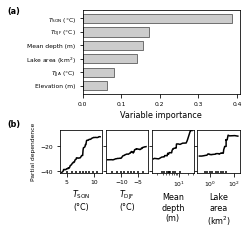

In [7]:
suffix = '_v10b'

suffix = '_v11'
file = f'rf_iceon_limited_seasonal_8params{suffix}'

with open(f'/Users/blagrave/Projects/IcePhenologyModels/Models/{file}.pickle', 'rb') as f:
    rf = pickle.load(f)
    
if suffix not in ['_v10b','_v11']:
    columns = ['TMINMAX_lagSON','Slope_100','TMINMAX_DJF', 'Lake_area'] #,('Lake_area','Slope_100')]
else:
    columns = ['TMINMAX_lagSON','TMINMAX_DJF', 'Depth_avg','Lake_area'] #,('Lake_area','Slope_100')]


    
X = pd.read_csv(f'/Users/blagrave/Projects/IcePhenologyModels/Models/{file}_input.csv')
fig = plot_model_summary(rf, X, columns,labelsize=labelsize,chsize=chsize)
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_on_model_summary.pdf')
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_on_model_summary.png',dpi=300)


print(X['TMINMAX_DJF'].max())
print('On prediction: ',rf.oob_prediction_[X['TMINMAX_DJF']==X['TMINMAX_DJF'].max()])



In [8]:
#X[X['TMINMAX_DJF']==2.24]
#rf.oob_prediction_[X['TMINMAX_DJF']==2.24]



2.0


$T_\mathrm{MAM}$ (°C)        0.553651
$T_\mathrm{DJF}$ (°C)        0.172823
$T_\mathrm{SON}$ (°C)        0.052029
Winter snowfall (mm)         0.051763
Elevation (m)                0.048583
$T_\mathrm{JJA}$ (°C)        0.046459
Spring precipitation (mm)    0.042854
Shoreline development        0.031838
dtype: float64

2.24 12.534782608695652 14.103846153846154
Off prediction:  [64.6]


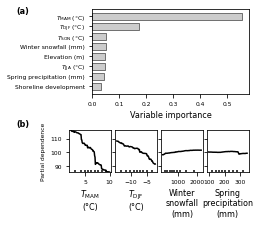

In [9]:
suffix = 'B_v11'
file = f'rf_iceoff_limited_seasonal_6params{suffix}'
with open(f'/Users/blagrave/Projects/IcePhenologyModels/Models/{file}.pickle', 'rb') as f:
    rf = pickle.load(f)
if suffix not in ['_v10b','_v11','B_v11']:
    columns = ['TMINMAX_MAM','TMINMAX_DJF','Elevation','Slope_100'] #,('Lake_area','Slope_100')]
else:
    columns = ['TMINMAX_MAM','TMINMAX_DJF','TMINMAX_lagSON','TMINMAX_lagJJA'] #,('Lake_area','Slope_100')]
    columns = ['TMINMAX_MAM','TMINMAX_DJF','Elevation','Shore_dev'] #,('Lake_area','Slope_100')]
    columns = ['TMINMAX_MAM','TMINMAX_DJF','SNOW_DJF','PRCP_MAM'] #,('Lake_area','Slope_100')]


    

X = pd.read_csv(f'/Users/blagrave/Projects/IcePhenologyModels/Models/{file}_input.csv')
fig = plot_model_summary(rf, X, columns,labelsize=labelsize,chsize=chsize)
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_off_model_summary.pdf')
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_off_model_summary.png',dpi=300)

print(X['TMINMAX_DJF'].max(), X['TMINMAX_MAM'].max(), X['TMINMAX_lagSON'].max())
print('Off prediction: ',rf.oob_prediction_[X['TMINMAX_DJF']==X['TMINMAX_DJF'].max()])


7.0 3.0625


NameError: name 'format_axes' is not defined

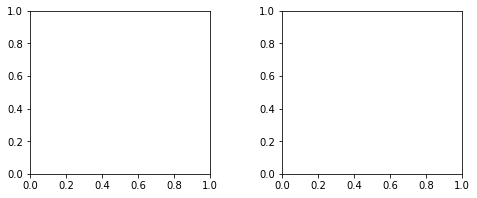

In [149]:
fig_final = plt.figure(figsize=(fig_width, fig_height))

print(fig_width, fig_height)

spec1 = gridspec.GridSpec(ncols=8, nrows=2, figure =fig_final,height_ratios=[spec_row_ratio,1])
spec1.update(hspace=h_gap/avg_plot_height,
             wspace=w_gap/col_width,
             top = 1 - top_margin/fig_height,
             bottom=bottom_margin/fig_height,
            left=left_margin/fig_width, 
             right=(fig_width/2. - right_margin)/fig_width)


spec2 = gridspec.GridSpec(ncols=8, nrows=2, figure=fig_final,height_ratios=[spec_row_ratio,1])
spec2.update(hspace=h_gap/avg_plot_height, 
             wspace = w_gap/col_width,
             top = 1 - top_margin/fig_height,
             bottom=bottom_margin/fig_height,
            left=(fig_width/2. + left_margin)/fig_width, 
             right=1 - right_margin/fig_width)


ax6 = fig_final.add_subplot(spec1[:,:])
ax7 = fig_final.add_subplot(spec2[:,:])


"""
gs = gridspec.GridSpec(3, 3, figure=fig_final)
ax1 = fig_final.add_subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig_final.add_subplot(gs[1, :-1])
ax3 = fig_final.add_subplot(gs[1:, -1])
ax4 = fig_final.add_subplot(gs[-1, 0])
ax5 = fig_final.add_subplot(gs[-1, -2])
"""
#fig_final.suptitle("GridSpec")
format_axes(fig_final)
fig_final.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/foo.pdf')



3.0625 7.0
0.5673758865248226 0.186046511627907 0.9673469387755103 0.22857142857142856 0.1142857142857143 0.4714285714285714
2.0


$T_\mathrm{SON}$ (°C)    0.387790
$T_\mathrm{DJF}$ (°C)    0.171912
Mean depth (m)           0.156135
Lake area (km$^2$)       0.139672
$T_\mathrm{JJA}$ (°C)    0.082291
Elevation (m)            0.062199
dtype: float64

2.0


$T_\mathrm{MAM}$ (°C)    0.572297
$T_\mathrm{DJF}$ (°C)    0.199356
$T_\mathrm{SON}$ (°C)    0.067858
$T_\mathrm{JJA}$ (°C)    0.062087
Elevation (m)            0.057138
Shoreline development    0.041265
dtype: float64

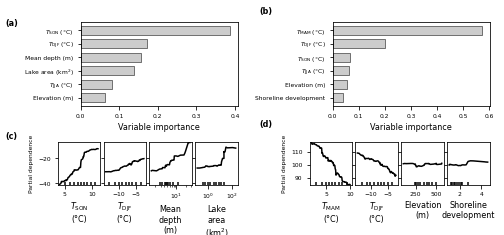

In [12]:
suffix = '_v10b'
suffix = '_v11'

fig_width = one_column_width*2


ncols = 4*2
nrows = 2
# in inches
top_margin = 0.2
bottom_margin = 0.7
left_margin = 0.8
right_margin = 0.2
w_gap = 0.2
h_gap = 0.6
spec_row_ratio = 1 / 0.5
top_margin = 0.1
bottom_margin = 0.7
left_margin = 0.8
right_margin = 0.2
w_gap = 0.05
h_gap = 0.5
spec_row_ratio = 1 / 0.5

plot_width = (fig_width - left_margin*2 - right_margin*2 - (w_gap)*(ncols-1)*2)/(ncols*2) * 2 + w_gap

plot_height = plot_width #* spec_row_ratio

avg_plot_height = plot_height * (1 + spec_row_ratio)/2.

col_width = (plot_width - w_gap)/2

#print('plot_width',plot_width)
#fig_height = bottom_margin + top_margin + plot_height+ plot_height* + spec_row_ratio*h_gap*(nrows-1)
fig_height = bottom_margin + top_margin + plot_height + plot_height*spec_row_ratio + h_gap*(nrows-1)


print(fig_height,fig_width)

fig_final = plt.figure(figsize=(fig_width, fig_height))

#fig_final.subplots_adjust(left=0,right=1,
#                         top = 1, bottom=0,
#                         wspace = 0, hspace=0)

# create a 2 rows 8 column container
spec1 = gridspec.GridSpec(ncols=8, nrows=2, figure =fig_final,
                          height_ratios=[spec_row_ratio,1])
#spec1.update(right=0.5,left=0.0)
#spec1.update(hspace=0.5,bottom=bottom,left=0.21/2.,right=0.5-0.02/2.,top=0.98)
print(h_gap/avg_plot_height, w_gap/col_width, 
      1-top_margin/fig_height,
      bottom_margin/fig_height,
     left_margin/fig_width, (fig_width/2. - right_margin)/fig_width)
spec1.update(hspace=h_gap/avg_plot_height,
             wspace=w_gap/col_width,
             top = 1 - top_margin/fig_height,
             bottom=bottom_margin/fig_height,
             left = left_margin/(fig_width/2.),
             right = 1 - right_margin/ (fig_width/2.))
#            left=left_margin/fig_width, 
#             right=(fig_width/2. - right_margin)/fig_width)


#spec1.update(hspace=0,wspace=0,top=1,bottom=0,left=0,right=1)
spec2 = None

# create another one
spec2 = gridspec.GridSpec(ncols=8, nrows=2, figure=fig_final,height_ratios=[spec_row_ratio,1])
#spec2.update(left=0.5,right=1.0)
#spec2.update(hspace=0.5,bottom=bottom,left=0.5+0.21/2.,right=1.0-0.02/2.,top=0.98)
spec2.update(hspace=h_gap/avg_plot_height, 
             wspace = w_gap/col_width,
             top = 1 - top_margin/fig_height,
             bottom=bottom_margin/fig_height,
             left = left_margin/(fig_width/2.),
             right = 1 - right_margin/(fig_width/2.))
            #left=(fig_width/2. + left_margin)/fig_width, 
            # right=1 - right_margin/fig_width)
#spec2.update(hspace=0,wspace=0,top=1,bottom=0,left=0,right=1)


#ncol = 0
for file,spec in zip([f'rf_iceon_limited_seasonal_8params{suffix}',f'rf_iceoff_limited_seasonal_6params{suffix}'],
                     [spec1,spec2]):
    if spec is None:
        continue
    with open(f'/Users/blagrave/Projects/IcePhenologyModels/Models/{file}.pickle', 'rb') as f:
        rf = pickle.load(f)
        
    if 'iceon' in file:
        columns = ['TMINMAX_lagSON','TMINMAX_DJF', 'Depth_avg','Lake_area'] #,('Lake_area','Slope_100')]
        labels= ['(a)','(c)']
    else:
        columns = ['TMINMAX_MAM','TMINMAX_DJF','Elevation','Shore_dev'] #,('Lake_area','Slope_100')]
        labels = ['','']
        #labels = ['(b)','(d)']

    X = pd.read_csv(f'/Users/blagrave/Projects/IcePhenologyModels/Models/{file}_input.csv')
    
    fig = plot_model_summary(rf, X, columns,width=two_column_width,
                             labelsize=labelsize,chsize=chsize,labels=labels)
    fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/foo.pdf')
    #print(fig.get_size_inches())

    axes = fig.get_axes()
    #fig_final = plt.figure(figsize=(fig.get_size_inches()[0]*2,fig.get_size_inches()[1]))
    
    for jj,ax in enumerate(axes):
        
        # remove axis from fig object
        ax.remove()
        
        # assign ax to fig_final object
        ax.figure=fig_final
        
        fig_final.axes.append(ax)
        fig_final.add_axes(ax)
        
        if jj == 0:
            #dummy = fig_final.add_subplot(111)
            dummy = fig_final.add_subplot(spec[0,1:])
            
        elif jj == 1:
            dummy = fig_final.add_subplot(spec[1,:2])
        else:
            #print('\t',(jj-1)*2, (jj-1)*2+2)
            dummy = fig_final.add_subplot(spec[1,(jj-1)*2:(jj-1)*2+2])#,sharey=axes[1]))
            
        #print(ax.bbox.get_points())
        # get actual coordinates
        # set position of ax, in figure coordinates -- based on spec
        
        #fig_final_ax_position = dummy.get_position().bounds
        bounds = np.array(dummy.get_position().bounds)
        
        if spec == spec2:
            bounds[0] = bounds[0] + 1

        ax.set_position(bounds)
        #print(bounds)
        #print(jj, dummy.get_position(), ax.get_position())
        dummy.remove()
        #break
    #ncol = ncol + 1
        #break
    if spec==spec2:
        
        ax.text(0.5+0.02/2,0.98,'(b)',ha='left',va='top',
            transform=fig_final.transFigure,weight='bold',fontsize=abcd_size)
        ax.text(0.5+0.02/2,0.47,'(d)',ha='left',va='top',
            transform=fig_final.transFigure,weight='bold',fontsize=abcd_size)


    plt.close(fig)
#fig_final.subplots_adjust(left=0,right=1,bottom=0,top=1)
#fig_final.tight_layout()
#fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_off_model_summary.pdf')
#fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_off_model_summary.png',dpi=300)
fig_final.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_onoff_model_summary.pdf')
#fig_final.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_onoff_model_summary.png',dpi=300)


plt.show()

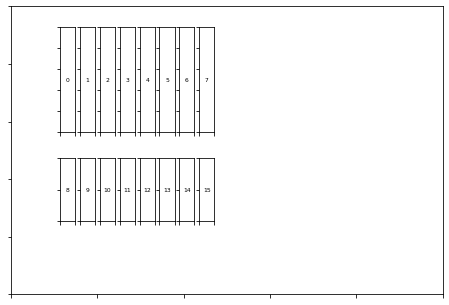

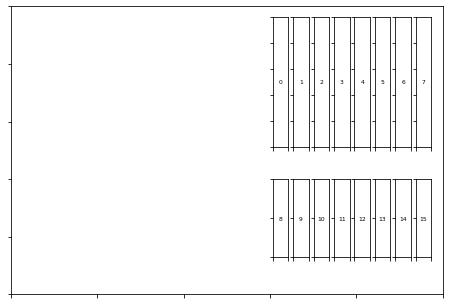

In [95]:
def display_gridspec(spec,fig=None):
    if fig is None:
        fig = plt.figure()
        
    ax0 = fig.add_subplot(111)
    ax0.tick_params(labelbottom=False, labelleft=False)
    fig.subplots_adjust(bottom=0,top=1,left=0,right=1)
    ii = 0
    for i in spec:
        ax0 = fig.add_subplot(i)
        ax0.tick_params(labelbottom=False, labelleft=False)
        ax0.text(0.5,0.5,ii,fontsize=6,ha='center',va='center')
        ii = ii+1
    return fig
        
fig = display_gridspec(spec2,fig=None)

1.6666666666666667


$T_\mathrm{MAM}$ (°C)    0.572297
$T_\mathrm{DJF}$ (°C)    0.199356
$T_\mathrm{SON}$ (°C)    0.067858
$T_\mathrm{JJA}$ (°C)    0.062087
Elevation (m)            0.057138
Shoreline development    0.041265
dtype: float64

[0.         0.54545455 1.         0.45454545]


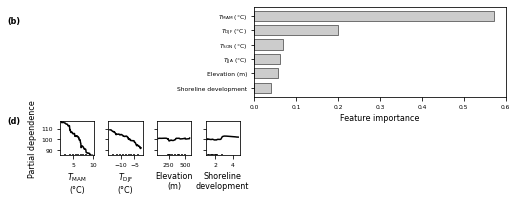

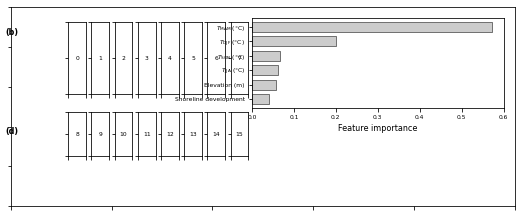

In [110]:
fig1 = plot_model_summary(rf, X, columns,width=two_column_width,
                             labelsize=labelsize,chsize=chsize,labels=labels)
fig1.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/foo1.pdf')


fig_width,fig_height = fig1.get_size_inches()

fig_width = fig_width*2


fig2 = plt.figure(figsize = (fig_width, fig_height))


spec1 = gridspec.GridSpec(ncols=8, nrows=2, figure =fig2,
                          height_ratios=[spec_row_ratio,1])

spec1.update(hspace=h_gap/avg_plot_height,
             wspace=w_gap/col_width,
             top = 1 - top_margin/fig_height,
             bottom=bottom_margin/fig_height,
            left=left_margin/fig_width, 
             right=(fig_width/2. - right_margin)/fig_width)

fig00 = display_gridspec(spec1,fig=fig2)


for jj,ax in enumerate(fig1.get_axes()):
    
    ax.figure = fig2
    fig2.axes.append(ax)
    fig2.add_axes(ax)
    
    if jj == 0:
        dummy = fig2.add_subplot(2,1,1) # 2 rows; 1 column
        #dummy = fig2.add_subplot(spec1[0,2:])

    elif jj == 1:
        #dummy = fig_final.add_subplot(spec1[1,:2])
        dummy = fig2.add_subplot(2,4,4+jj)
    else:
        dummy = fig2.add_subplot(2,4,4+jj)
        #dummy = fig2.add_subplot(spec1[1,(jj-1)*2:(jj-1)*2+2])#,sharey=axes[1]))
         
    bounds = np.array(dummy.get_position().bounds)
    print(bounds)
    bounds[0] = bounds[0] + 1
    
    ax.set_position(bounds)
    dummy.remove()
    break
plt.close(fig)
fig2.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/foo2.pdf')


1.6666666666666667


$T_\mathrm{MAM}$ (°C)    0.572297
$T_\mathrm{DJF}$ (°C)    0.199356
$T_\mathrm{SON}$ (°C)    0.067858
$T_\mathrm{JJA}$ (°C)    0.062087
Elevation (m)            0.057138
Shoreline development    0.041265
dtype: float64

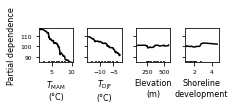

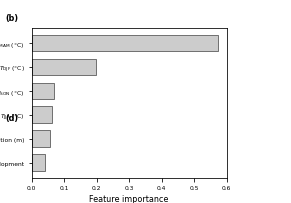

In [57]:
import matplotlib.pyplot as plt

fig1 = plot_model_summary(rf, X, columns,width=two_column_width,
                             labelsize=labelsize,chsize=chsize,labels=labels)
ax = fig1.get_axes()[0]

fig1.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/foo1.pdf')

ax.remove()

fig2 = plt.figure(figsize=fig1.get_size_inches())
ax.figure=fig2
fig2.axes.append(ax)
fig2.add_axes(ax)

dummy = fig2.add_subplot(111)
ax.set_position(dummy.get_position())
dummy.remove()


fig2.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/foo2.pdf')

plt.show()

In [26]:
for file in ['rf_iceon_limited_seasonal_8params','rf_iceoff_limited_seasonal_6params']:
    with open(f'/Users/blagrave/Projects/IcePhenologyModels/Models/{file}.pickle', 'rb') as f:
        rf = pickle.load(f)
    #display()
    columns = pd.Series({i:j for i, j in zip(rf.feature_names_in_,rf.feature_importances_)}).sort_values(ascending=False)
    display(columns)
    print(rf.oob_score_)
    columns = columns.index
    #columns = columns[:3]
    x,y = np.meshgrid(columns,columns)
    columns = [(i,j) if (i!=j) else i for i,j in np.stack([x,y],axis=2).reshape((-1,2)).tolist()]
    X = pd.read_csv(f'/Users/blagrave/Projects/IcePhenologyModels/Models/{file}_input.csv')
    print(X.shape, X.drop_duplicates(['Slope_100','Elevation']).shape)
    plot_partial_dependence(rf, X, columns, filename=f'{file}_pdp', structured=True)
    #break

TMINMAX_lagSON    0.380276
Slope_100         0.194859
TMINMAX_DJF       0.132456
Lake_area         0.110712
TMINMAX_lagJJA    0.067405
Depth_avg         0.048500
Elevation         0.037480
Shore_dev         0.028312
dtype: float64

0.7630798159327896
(2294, 8) (73, 8)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11bdf4700> (for post_execute):


KeyboardInterrupt: 

In [5]:
if 'levels' in {'levels':2}:
    print('yes')

yes


In [64]:
X.drop_duplicates(['Elevation','Slope_100']).shape

(74, 6)